# Three_way mixed ANOVA: 1 between and 2 within-subjects factors

In [6]:
library(rstatix)
library(ggpubr)
library(readxl)

In [11]:
Dyslexia_Multisensory = read_excel("D://Amar//Codes_Data//Dyslexia_Multisensory.xlsx")

In [12]:
Dyslexia_Multisensory = Dyslexia_Multisensory %>% gather(key = "Stimulus", value = "ACC", Visual, Auditory, Audio_visual)

In [13]:
Dyslexia_Multisensory

id,SOA,group,Stimulus,ACC
<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Long,Dyslexia,Visual,0.5215
2,Long,Dyslexia,Visual,0.5795
3,Long,Dyslexia,Visual,0.5675
4,Long,Dyslexia,Visual,0.5560
5,Long,Dyslexia,Visual,0.4750
6,Long,Dyslexia,Visual,0.4750
7,Long,Dyslexia,Visual,0.5560
8,Long,Dyslexia,Visual,0.6255
9,Long,Dyslexia,Visual,0.5675


In [14]:
Dyslexia_Multisensory %>% group_by(group, SOA, Stimulus) %>% get_summary_stats(ACC, type = "mean_sd")

SOA,group,Stimulus,variable,n,mean,sd
<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
Long,Dyslexia,Audio_visual,ACC,12,0.573,0.047
Long,Dyslexia,Auditory,ACC,12,0.578,0.065
Long,Dyslexia,Visual,ACC,12,0.545,0.043
Short,Dyslexia,Audio_visual,ACC,12,0.689,0.072
Short,Dyslexia,Auditory,ACC,12,0.621,0.071
Short,Dyslexia,Visual,ACC,12,0.587,0.047
Long,Normal,Audio_visual,ACC,12,0.841,0.076
Long,Normal,Auditory,ACC,12,0.671,0.050
Long,Normal,Visual,ACC,12,0.540,0.063


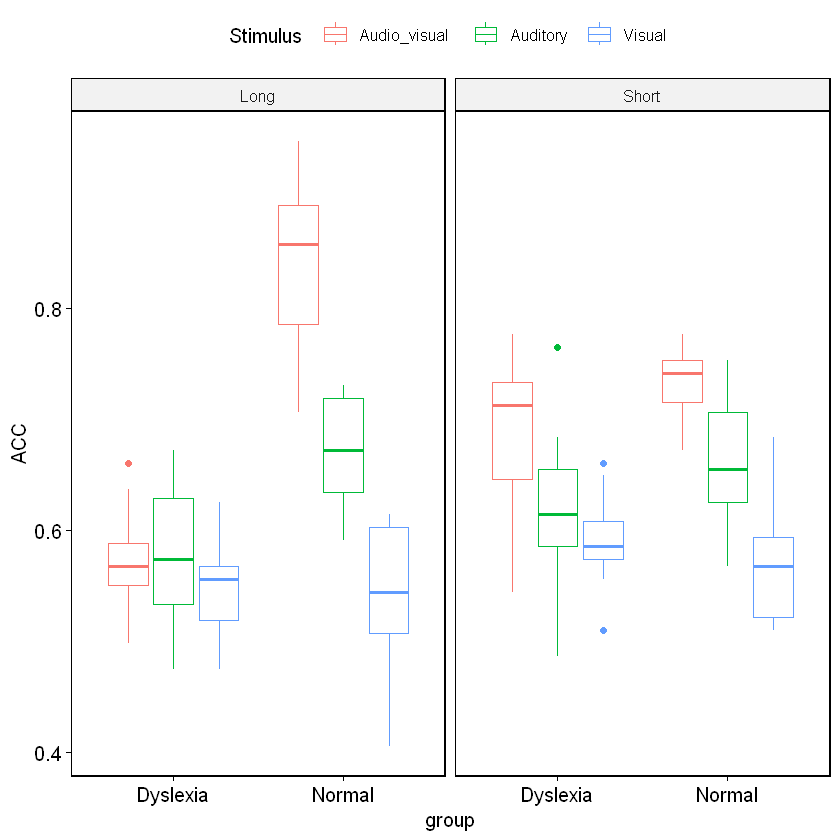

In [16]:
ggboxplot(Dyslexia_Multisensory, x= "group", y = "ACC", color = "Stimulus", facet.by = "SOA")

In [17]:
Dyslexia_Multisensory %>% group_by(SOA, group, Stimulus) %>% identify_outliers(ACC)

SOA,group,Stimulus,id,ACC,is.outlier,is.extreme
<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
Long,Dyslexia,Audio_visual,2,0.6605,TRUE,FALSE
Short,Dyslexia,Auditory,10,0.7645,TRUE,FALSE
Short,Dyslexia,Visual,1,0.5100,TRUE,FALSE
Short,Dyslexia,Visual,3,0.6605,TRUE,FALSE
Short,Dyslexia,Visual,4,0.5100,TRUE,FALSE


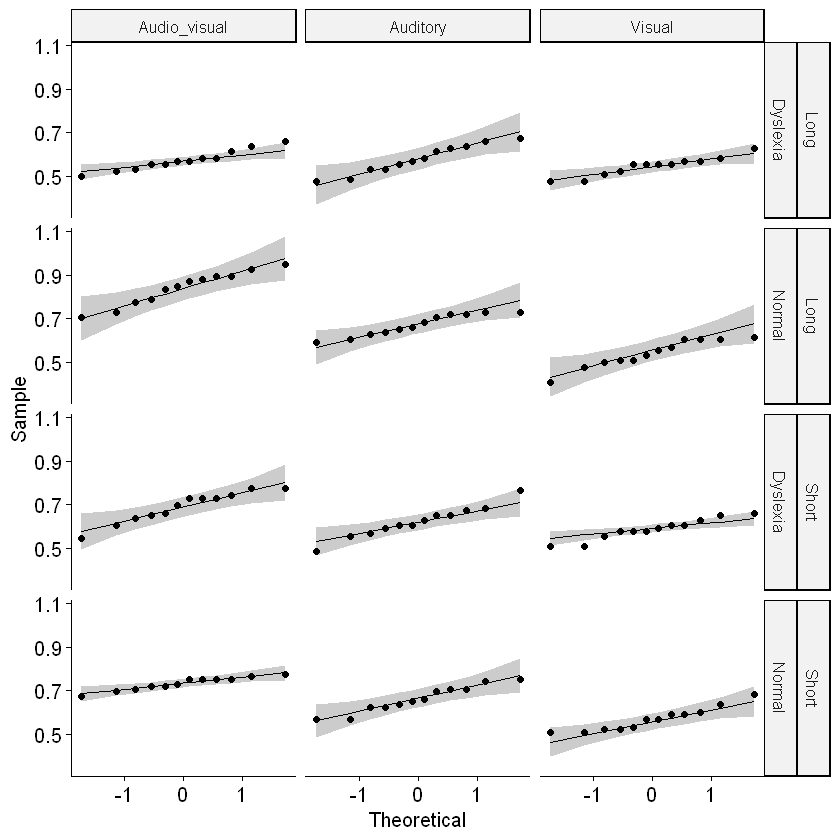

In [19]:
ggqqplot(Dyslexia_Multisensory, "ACC") + facet_grid(SOA + group ~ Stimulus)

In [20]:
Dyslexia_Multisensory %>% group_by(SOA, group, Stimulus) %>% shapiro_test(ACC)

SOA,group,Stimulus,variable,statistic,p
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Long,Dyslexia,Audio_visual,ACC,0.9649090,0.8509028
Long,Dyslexia,Auditory,ACC,0.9571979,0.7432089
Long,Dyslexia,Visual,ACC,0.9173082,0.2643971
Long,Normal,Audio_visual,ACC,0.9525447,0.6744326
Long,Normal,Auditory,ACC,0.9123400,0.2285804
Long,Normal,Visual,ACC,0.9223457,0.3059440
Short,Dyslexia,Audio_visual,ACC,0.9313724,0.3948864
Short,Dyslexia,Auditory,ACC,0.9816773,0.9894564
Short,Dyslexia,Visual,ACC,0.9422786,0.5281443


In [21]:
Dyslexia_Multisensory %>% group_by(SOA, Stimulus) %>% levene_test(ACC ~ group)

Warning message:
"There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(.data$data, .f, ...)`.
Caused by warning in `leveneTest.default()`:
! group coerced to factor.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings."


SOA,Stimulus,df1,df2,statistic,p
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
Long,Audio_visual,1,22,2.86593148,0.10458846
Long,Auditory,1,22,0.69056156,0.41490169
Long,Visual,1,22,2.44191584,0.13240318
Short,Audio_visual,1,22,5.13559732,0.03362179
Short,Auditory,1,22,0.05744932,0.81279285
Short,Visual,1,22,0.37600912,0.54603472


In [22]:
anova_test(data = Dyslexia_Multisensory, dv = ACC, wid= id, between = group, within = c(SOA, Stimulus))

Warning message:
"The 'wid' column contains duplicate ids across between-subjects variables. Automatic unique id will be created"


ANOVA Table (type II tests)

$ANOVA
              Effect DFn DFd      F        p p<.05   ges
1              group   1  22 38.771 2.88e-06     * 0.284
2                SOA   1  22  7.912 1.00e-02     * 0.028
3           Stimulus   2  44 82.199 1.38e-15     * 0.541
4          group:SOA   1  22 51.698 3.31e-07     * 0.157
5     group:Stimulus   2  44 26.222 3.18e-08     * 0.274
6       SOA:Stimulus   2  44  0.784 4.63e-01       0.013
7 group:SOA:Stimulus   2  44  9.966 2.69e-04     * 0.147

$`Mauchly's Test for Sphericity`
              Effect     W     p p<.05
1           Stimulus 0.850 0.181      
2     group:Stimulus 0.850 0.181      
3       SOA:Stimulus 0.758 0.055      
4 group:SOA:Stimulus 0.758 0.055      

$`Sphericity Corrections`
              Effect   GGe      DF[GG]    p[GG] p[GG]<.05   HFe      DF[HF]
1           Stimulus 0.870 1.74, 38.26 7.66e-14         * 0.938 1.88, 41.26
2     group:Stimulus 0.870 1.74, 38.26 2.02e-07         * 0.938 1.88, 41.26
3       SOA:Stimulus 0.805 1.61, 35.44 4.39e-01           0.860 1.72, 37.82
4 group:SOA:Stimulus 0.805 1.61, 35.44 8.04e-04         * 0.860 1.72, 37.82
     p[HF] p[HF]<.05
1 9.38e-15         *
2 7.67e-08         *
3 4.46e-01          
4 5.93e-04         *